<a href="https://colab.research.google.com/github/Veena9977/Practice2/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
#Load the dataset to python environment
df = pd.read_csv('/content/diabetes.csv')

In [92]:
#Retrieve the  first five rows in the table.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
#Retrieve the information about the table,it includes column name,type etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
#This shows the statistical summary of data which includes mean,max,min etc..
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [95]:
#Displays the titles or headings of each column
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [96]:
#Check for null values in dataset
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [97]:
#Check for duplicates
df.duplicated().sum()

0

In [98]:
#Assign these columns to a variable.Pregnancies column has no impact on outcome hence it is not take.Age cannot be zero.Hence it is also not taken.
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [99]:
#Replace the zeros in the respective columns with NaN
df[cols] = df[cols].replace(0, np.nan)

In [100]:
#Retrieve the information about first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


MISSING VALUES

In [101]:
#Check the missing values
df.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [102]:
#Calculate the median of column Glucose
df['Glucose'].median()

117.0

In [103]:
#Calculate the median of column BloodPressure
df['BloodPressure'].median()

72.0

In [104]:
df['SkinThickness'].median()

29.0

In [105]:
df['Insulin'].median()

125.0

In [106]:
df['BMI'].median()

32.3

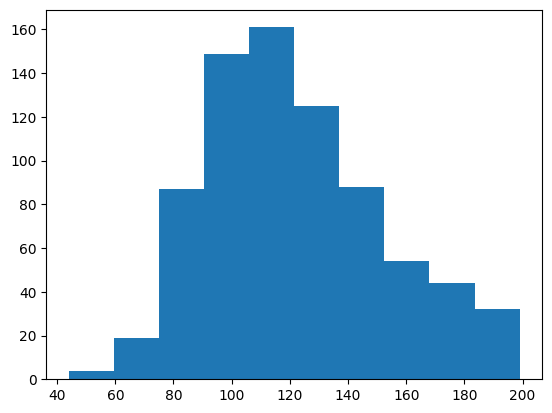

In [107]:
#Glucose is a numerical variable.So plot the histogram for the column Glucose
plt.hist(df['Glucose'])
plt.show()

In [108]:
#Plot of column Glucose is continuous feature, so replacing missing values with the mean.
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())

In [109]:
#Display the missing values.Now the missing values corresponding to the column Glucose is now becomes zero.
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


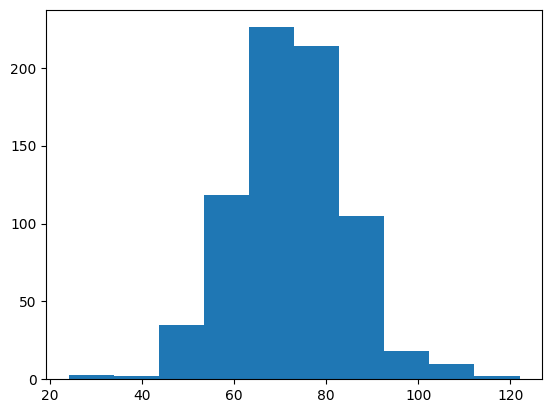

In [110]:
plt.hist(df['BloodPressure'])
plt.show()

In [111]:
#Plot of this column is continuous feature, so replacing missing values with the mean.
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())

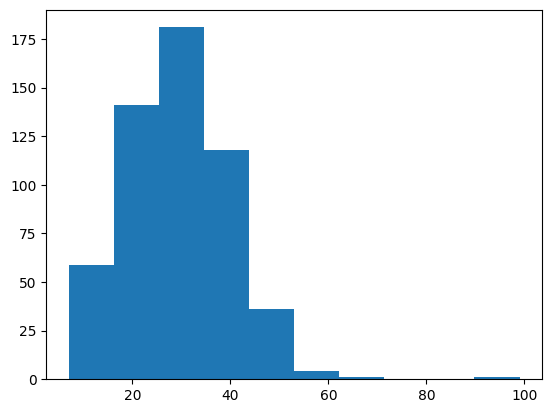

In [112]:
plt.hist(df['SkinThickness'])
plt.show()

In [113]:
#Plot of this column is skewed.So fill the missing values with median.
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())

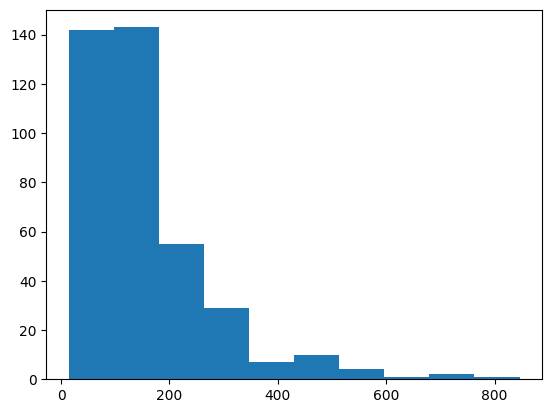

In [114]:
plt.hist(df['Insulin'])
plt.show()

In [115]:
#Plot of this column is skewed.So fill the missing values with median.
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

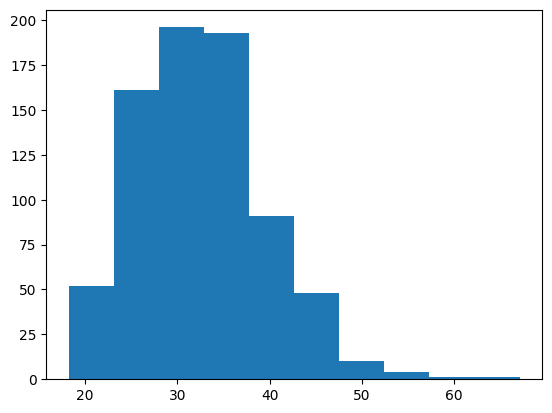

In [116]:
plt.hist(df['BMI'])
plt.show()

In [117]:
#Plot of this column is skewed.So fill the missing values with median.
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [118]:
#Now all missing values becomes zero
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [119]:
#Retrieve information about first five rows.Now the columns missing values are replaced.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


OUTLIER DETECTION

Here while removing outliers the values becomes null so maintain the outliers in this case.

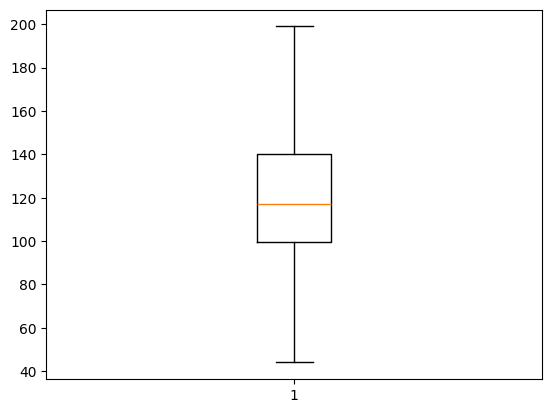

In [120]:
plt.boxplot(df['Glucose'])
plt.show()

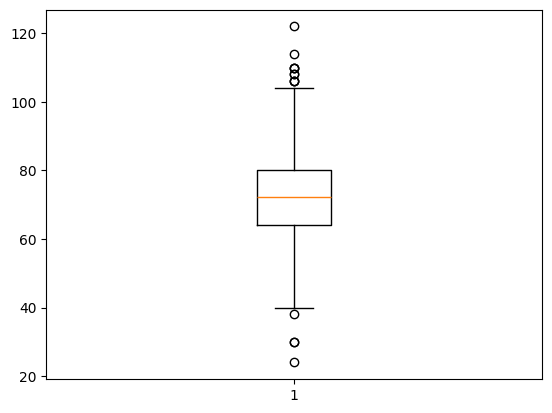

In [121]:
plt.boxplot(df['BloodPressure'])
plt.show()

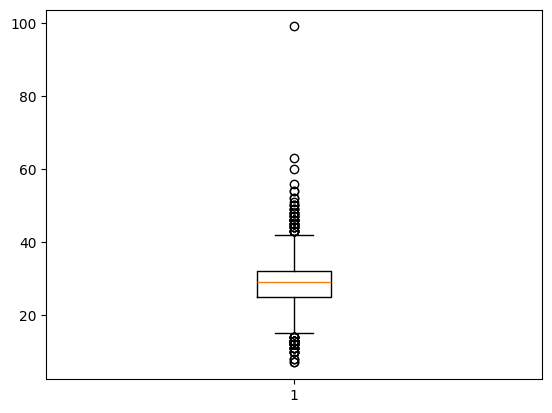

In [122]:
plt.boxplot(df['SkinThickness'])
plt.show()

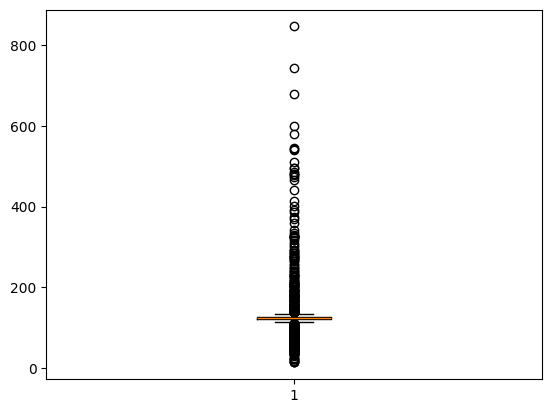

In [123]:
plt.boxplot(df['Insulin'])
plt.show()

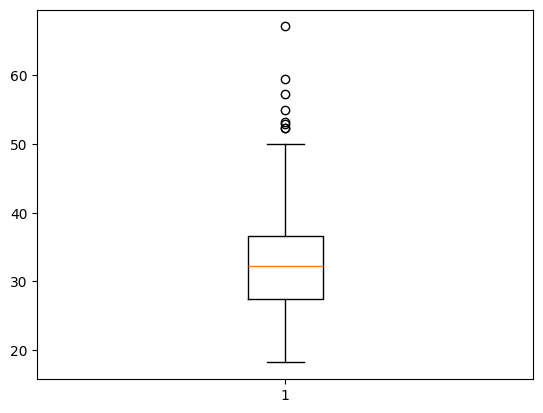

In [124]:
plt.boxplot(df['BMI'])
plt.show()

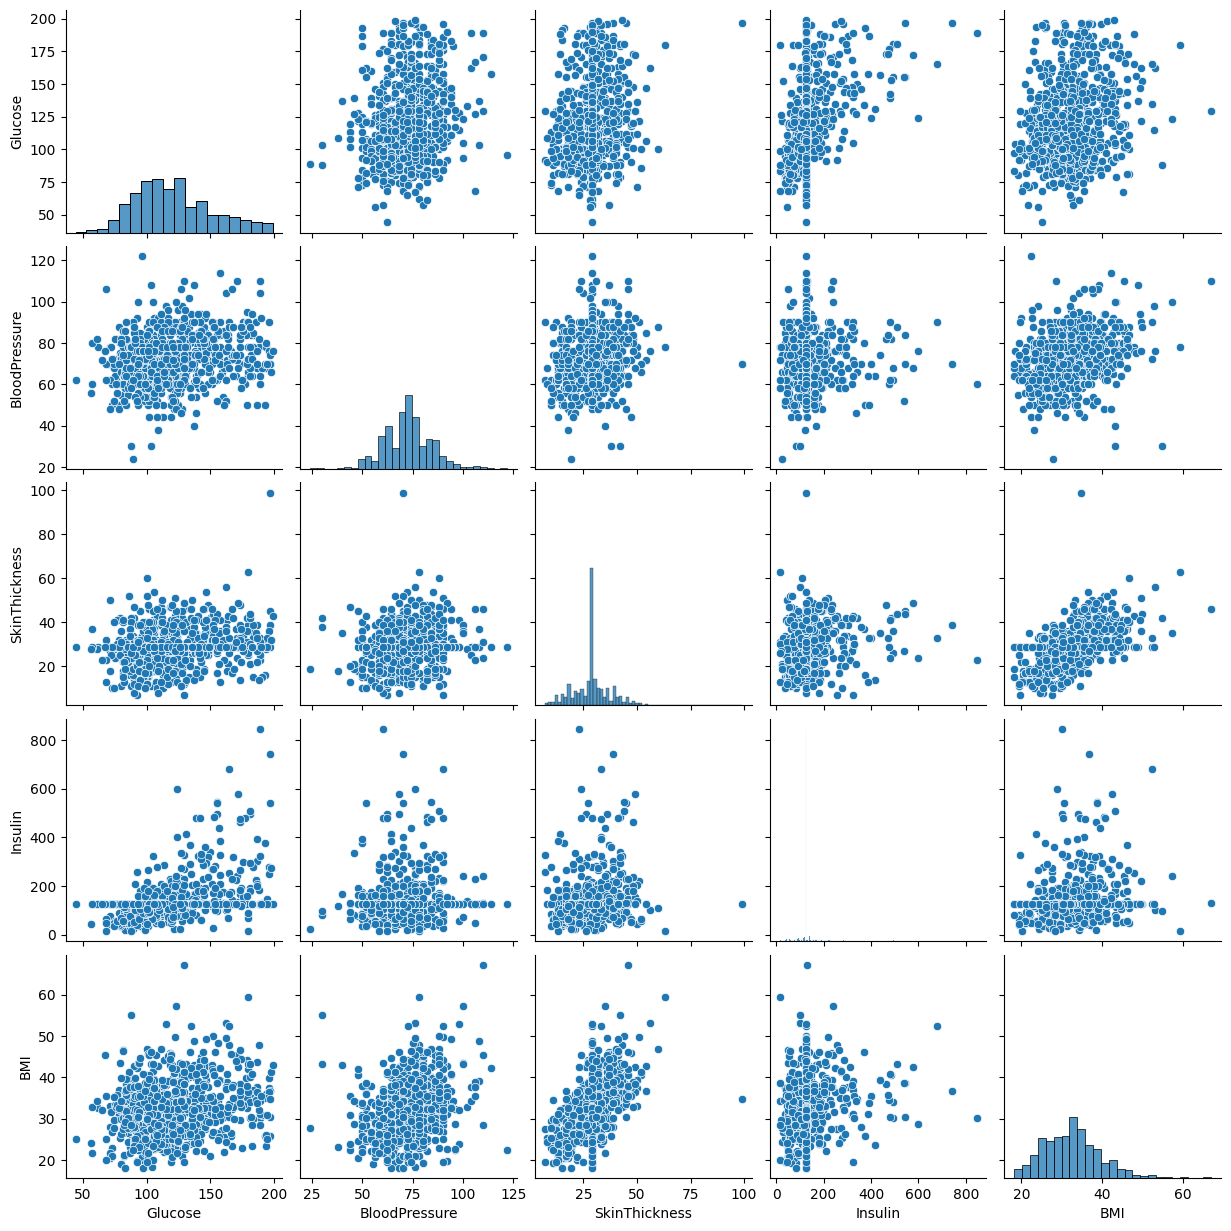

In [125]:
#Display the pair plot
sns.pairplot(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']])
plt.show()

In [126]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [127]:
df.shape

(768, 9)

In [128]:
#Find the correlation among the numerical variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

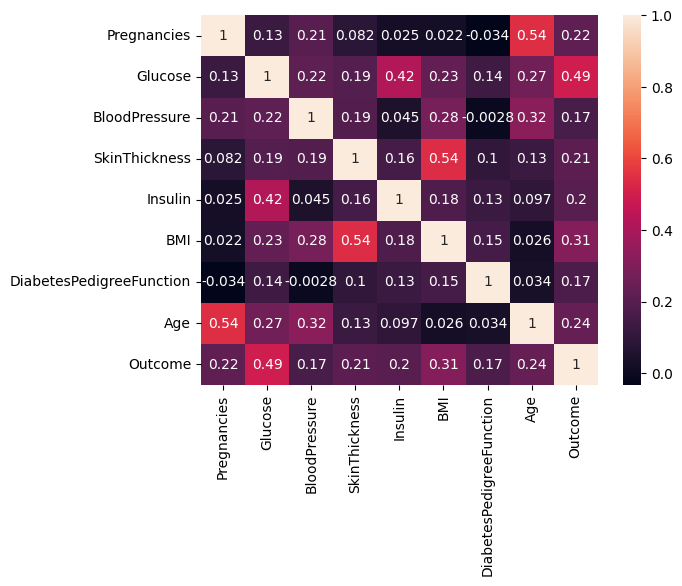

In [129]:
#Dispaly the heat map
corrmatrix = df.corr()
sns.heatmap(corrmatrix,annot = True)

In [130]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

SCALING

In [131]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [133]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [134]:
#Scaling or normalizing the numerical columns using a scaler
x.loc[:,num_cols] = sc.fit_transform(x[num_cols])
x.head()

<ipython-input-134-924250012a2b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.63994726 -0.84488505  1.23388019 -0.84488505 -1.14185152  0.3429808
 -0.25095213  1.82781311 -0.54791859  1.23388019  0.04601433  1.82781311
  1.82781311 -0.84488505  0.3429808   0.93691372 -1.14185152  0.93691372
 -0.84488505 -0.84488505 -0.25095213  1.23388019  0.93691372  1.53084665
  2.12477957  1.82781311  0.93691372 -0.84488505  2.7187125   0.3429808
  0.3429808  -0.25095213 -0.25095213  0.63994726  1.82781311  0.04601433
  2.12477957  1.53084665 -0.54791859  0.04601433 -0.25095213  0.93691372
  0.93691372  1.53084665  0.93691372 -1.14185152 -0.84488505 -0.54791859
  0.93691372  0.93691372 -0.84488505 -0.84488505  0.3429808   1.23388019
  0.93691372 -0.84488505  0.93691372 -1.14185152 -1.14185152 -1.14185152
 -0.54791859  1.23388019  0.3429808  -0.54791859  0.93691372  0.3429808
 -1.14185152 -0.54791859 -0.84488505  0.046014

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [135]:
#Remove the outcome column because it is the target variable.
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [136]:
# Split data into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [137]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.405184,29.0,125.0,32.3,0.304,21
618,9,112.0,82.000000,24.0,125.0,28.2,1.282,50
346,1,139.0,46.000000,19.0,83.0,28.7,0.654,22
294,0,161.0,50.000000,29.0,125.0,21.9,0.254,65
231,6,134.0,80.000000,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.0,140.0,28.6,0.411,26
106,1,96.0,122.000000,29.0,125.0,22.4,0.207,27
270,10,101.0,86.000000,37.0,125.0,45.6,1.136,38
435,0,141.0,72.405184,29.0,125.0,42.4,0.205,29


In [138]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [139]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.0,58.0,33.0,190.0,34.0,0.430,43
324,2,112.0,75.0,32.0,125.0,35.7,0.148,21
624,2,108.0,64.0,29.0,125.0,30.8,0.158,21
690,8,107.0,80.0,29.0,125.0,24.6,0.856,34
473,7,136.0,90.0,29.0,125.0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165.0,88.0,29.0,125.0,30.4,0.302,49
534,1,77.0,56.0,30.0,56.0,33.3,1.251,24
344,8,95.0,72.0,29.0,125.0,36.8,0.485,57
296,2,146.0,70.0,38.0,360.0,28.0,0.337,29


In [140]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


LOGISTIC REGRESSION

In [141]:
#Choose logistic regression model beacuse it is a binary classification problem ,the target variable consists of zero and one.
# Initializes an instance of the LogisticRegression class
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [142]:
#Train the model using training data
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
#Make predictions with a trained logistic regression model
y_pred = log.predict(x_test)

In [144]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [146]:
#Compute the confusion matrix
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [19, 36]])

In [147]:
#Calculate and display accuracy,precision,recall score,f1 score
print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('precision_score = ',precision_score(y_test,y_pred))
print('recall_score = ',recall_score(y_test,y_pred))
print('f1_score = ',f1_score(y_test,y_pred))

accuracy_score =  0.7727272727272727
precision_score =  0.6923076923076923
recall_score =  0.6545454545454545
f1_score =  0.6728971962616822


In [148]:
# Fit the scaler only on the training data and then use it to transform both the training and test data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [149]:
#Fit the model into training data
model1 = LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
#Make predictions on the test data
y_pred_sc = model1.predict(x_test)

In [151]:
#Compute the confusion matrix
confusion_matrix(y_test,y_pred_sc)

array([[83, 16],
       [19, 36]])

In [152]:
#Display the accuracy score
accuracy_score(y_test,y_pred_sc)

0.7727272727272727

KNN CLASSIFICATION MODEL

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
#Evaluates its accuracy for different values of K
metrik_k = []
neighbors = np.arange(1,11)

for k in neighbors :
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(x_train,y_train)
   y_pred = classifier.predict(x_test)
   acc = accuracy_score(y_test,y_pred)
   metrik_k.append(acc)

In [155]:
# List to store accuracy for each k
metrik_k

[0.6818181818181818,
 0.6883116883116883,
 0.6688311688311688,
 0.7012987012987013,
 0.6753246753246753,
 0.6883116883116883,
 0.6623376623376623,
 0.6883116883116883,
 0.6948051948051948,
 0.7337662337662337]

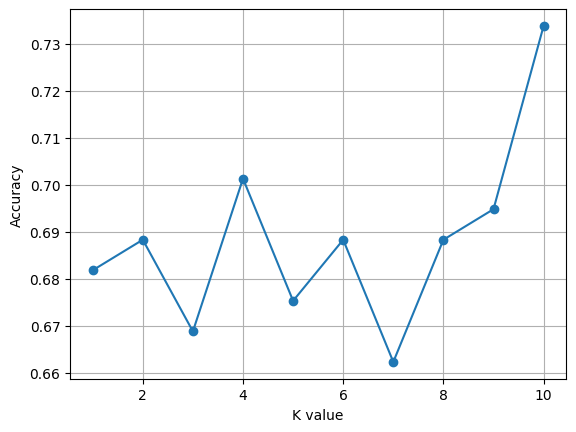

In [156]:
#Plotting the accuracy of the K-Nearest Neighbors (KNN) classifier for different values of k
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [157]:
# Initializes a K-Nearest Neighbors (KNN) classifier with 10 neighbors, fits it to the training data.
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [158]:
# Make predictions with the trained K-Nearest Neighbors (KNN) classifier
y_pred_knn = classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7337662337662337

In [159]:
#Initialize a K-Nearest Neighbors (KNN) classifier with 10 neighbors, then train it using scaled training data.
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=10)

In [160]:
#Make predictions with the K-Nearest Neighbors (KNN) model on the scaled test data and find the accuracy score
y_pred_knn_sc = classifier.predict(x_test_sc)
accuracy_score(y_test,y_pred_knn_sc)

0.7272727272727273

SVM CLASSIFIER MODEL

In [161]:
from sklearn.svm import SVC
sv = SVC()

In [162]:
# Making predictions using svm classifier and calculating the accuracy score.
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
accuracy_score(y_test,y_pred_sv)

0.7662337662337663

In [163]:
##Make predictions with the SVM model on the scaled test data and find the accuracy score
sv.fit(x_train_sc,y_train)
y_pred_sv_sc = sv.predict(x_test_sc)
accuracy_score(y_test,y_pred_sv_sc)

0.7467532467532467

In [164]:
#Compute the confusion matrix
confusion_matrix(y_pred_sv_sc,y_test)

array([[83, 23],
       [16, 32]])

In [165]:
#Train a Support Vector Machine (SVM) classifier with a polynomial kernel and find accuracy score
sv1 = SVC(kernel = "poly",degree=3)
sv1.fit(x_train,y_train)
y_pred_sv1 = sv1.predict(x_test)
accuracy_score(y_test,y_pred_sv1)

0.7727272727272727

In [166]:
#Train a Support Vector Machine (SVM) classifier with a linear kernel and find accuracy score
sv1 = SVC(kernel = "linear")
sv1.fit(x_train,y_train)
y_pred_sv1 = sv1.predict(x_test)
accuracy_score(y_test,y_pred_sv1)

0.7597402597402597

NAIVE BAYES MODEL

In [167]:
#Create model and train model using naive bayes classifier and calculate the accuracy score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
accuracy_score(y_test,y_pred_gnb)

0.7532467532467533

DECISON TREE

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
#Initialize a Decision Tree Classifier with the entropy criterion for splitting the nodes
clf = DecisionTreeClassifier(criterion = 'entropy')

In [170]:
#Train classifier on a dataset and find the accuracy score
clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.7142857142857143

In [171]:
#Trained on scaled features and find the accuracy score
clf.fit(x_train_sc,y_train)
y_pred_dt_sc = clf.predict(x_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.7272727272727273

In [172]:
#Access the classes
clf.classes_

array([0, 1])

#By comparing the model accuracy for logistic regression is 0.77 and for svm using kernel is 0.772.Hence these models are best for diabetes prediction.Logistic regression model work well for classification problems. SVM using kernel is good especially when the data is not linearly separable.

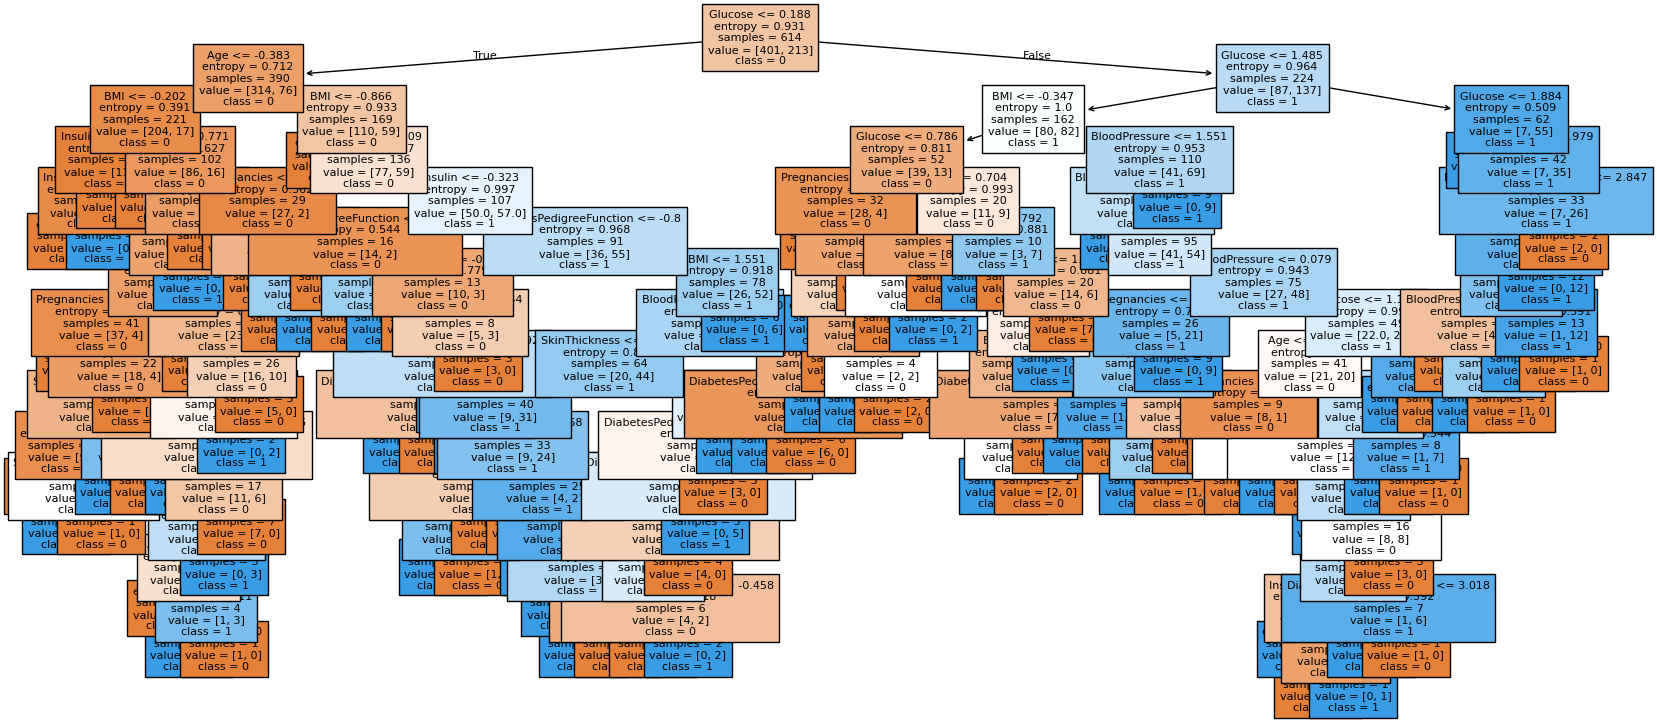

In [173]:
#Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(20,9))
tree.plot_tree(clf, feature_names = x_train.columns,
               class_names = clf.classes_.astype('str'),
               filled = True,
               fontsize=8)
plt.show()